In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay

In [2]:
data = pd.read_csv('./bioresponse.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(3751, 1777)

### Проверили, что во всём датасете нет пустых значений

In [4]:
data.isnull().sum(axis=0).sum()

0

### Проверили на дисбаланс классов. Датасет оказался достаточно сбалансирован

In [5]:
data['Activity'].value_counts()

1    2034
0    1717
Name: Activity, dtype: int64

### Поскольку работаем с "деревянными" классификаторами, то процедуру нормализации данных можем пропустить, так как "деревья" устойчивы к масштабированию и монотонным преобразованиям. Разобьем датасет на тренировочную и тестовую выборку.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0], test_size=0.2, random_state=42)

### Small decision tree

In [7]:
sdt = DecisionTreeClassifier(random_state=0, max_depth=10)
sdt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

### Deep decision tree

In [8]:
ddt = DecisionTreeClassifier(random_state=0)
ddt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### RandomForest small tree

In [9]:
srf = RandomForestClassifier(max_depth=2, random_state=0)
srf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

### RandomForest deep tree

In [10]:
drf = RandomForestClassifier(random_state=0)
drf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## Calculate the following metrics to check the quality of your models:
## - precision;
## - recall;
## - accuracy;
## - F1-score;
## - log-loss;


In [11]:
clfs = [sdt, ddt, srf, drf]
for clf in clfs:
    print(clf, 'precision: %.3f' % precision_score(y_test, clf.predict(X_test), average='macro'),
          ' recall:%.3f' % recall_score(y_test, clf.predict(X_test), average='macro'),
          ' accuracy:%.3f' % accuracy_score(y_test, clf.predict(X_test)),
          ' F1-score:%.3f' % f1_score(y_test, clf.predict(X_test), average='macro'),
          ' log-loss:%.3f' % log_loss(y_test, clf.predict(X_test)))

DecisionTreeClassifier(max_depth=10, random_state=0) precision: 0.742  recall:0.741  accuracy:0.748  F1-score:0.742  log-loss:8.692
DecisionTreeClassifier(random_state=0) precision: 0.712  recall:0.713  accuracy:0.719  F1-score:0.712  log-loss:9.704
RandomForestClassifier(max_depth=2, random_state=0) precision: 0.734  recall:0.727  accuracy:0.739  F1-score:0.729  log-loss:9.014
RandomForestClassifier(random_state=0) precision: 0.810  recall:0.811  accuracy:0.815  F1-score:0.811  log-loss:6.393


## 3. Plot precision-recall and ROC curves for your models.

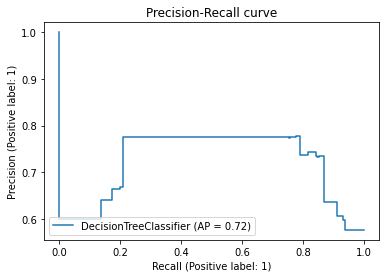

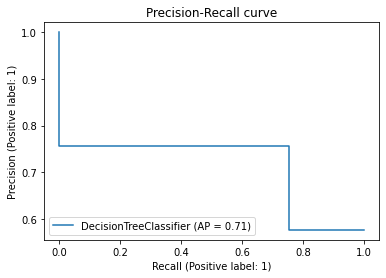

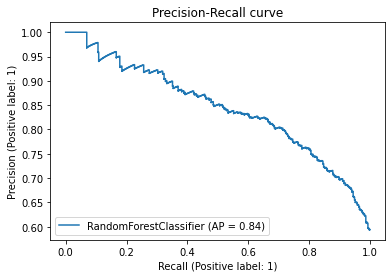

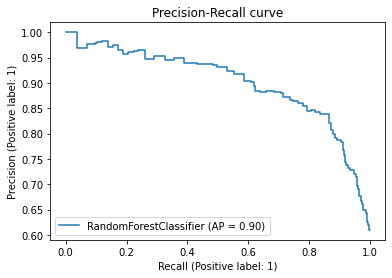

In [12]:
for clf in clfs:
    display = PrecisionRecallDisplay.from_estimator(
        clf, X_test, y_test
    )
    _ = display.ax_.set_title("Precision-Recall curve")

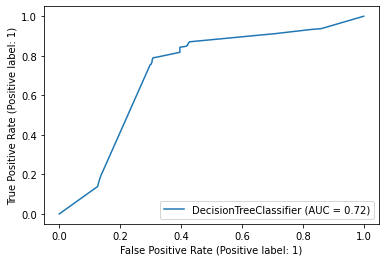

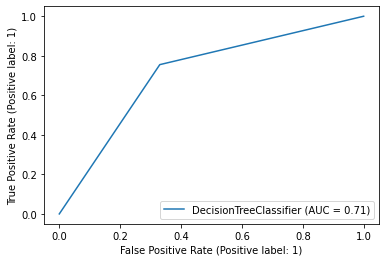

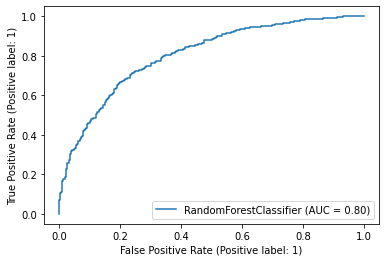

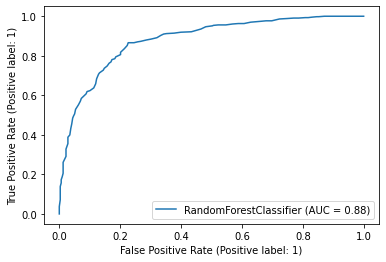

In [13]:
for clf in clfs:
    RocCurveDisplay.from_estimator(clf, X_test, y_test)

## Train a classifier who avoids Type II (False Negative) errors and calculate metrics  from p.2 for it.

### To minimize false negatives, we could remove Negative classes from Train set.

In [25]:
y_train_new = y_train[y_train==1]
X_train_new = X_train.loc[y_train_new.index]

## Let's train the best classifier - RandomForest

In [26]:
drf_new = RandomForestClassifier(random_state=0)
drf_new.fit(X_train_new, y_train_new)

RandomForestClassifier(random_state=0)

In [27]:
print(drf_new, 'precision: %.3f' % precision_score(y_test, drf_new.predict(X_test), average='macro'),
' recall:%.3f' % recall_score(y_test, drf_new.predict(X_test), average='macro'),
' accuracy:%.3f' % accuracy_score(y_test, drf_new.predict(X_test)),
' F1-score:%.3f' % f1_score(y_test, drf_new.predict(X_test), average='macro'),
' log-loss:%.3f' % log_loss(y_test, drf_new.predict(X_test)))

RandomForestClassifier(random_state=0) precision: 0.288  recall:0.500  accuracy:0.577  F1-score:0.366  log-loss:14.625


C:\Users\gto_n\.conda\envs\raifhack_2021\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Вывод: Наилучшим классификатором для предсказания является RandomForest с большой глубиной решающих деревьев. При обучении того же алгоритма исключительно на положительных лейблах, то эффективность алгоритма существенно снижается